$$
Mx'' + Cx' + Kx = f(t)
$$

In [ ]:
#] add http://github.com/onsas/onsas.jl

In [ ]:
#] add Plots

In [1]:
using Revise

In [13]:
using ONSAS, Plots, Test, BenchmarkTools

# ------------------------
# Problem formulation
# ------------------------
M = [2 0; 0 1.]
K = [6 -2; -2 4.]
C = zeros(2, 2)
f = [0.0, 10.0]
example_9_1_Bathe = SecondOrderAffineContinuousSystem(M, C, K, f)

NSTEPS = 500
tdom = range(0, NSTEPS * 0.1, length=NSTEPS + 1)
U₀, U₀′ = zeros(2), zeros(2)
prob = InitialValueProblem(example_9_1_Bathe, (U₀, U₀′))

# ------------------------
# Analytic solution
# ------------------------
A = [1/√3  (1/2)*√(2/3);
     1/√3      -√(2/3)]
x₁(t) = (5 / √3) * (1 - cos(t*√2))
x₂(t) = (2 * √(2/3)) * (-1 + cos(t*√5))
U(t) = A * [x₁(t), x₂(t)]

# ------------------------
# Central difference
# ------------------------
sol = solve(prob, CentralDifference(Δt=0.1), NSTEPS).U
ind = 150:170
fig = plot(xlab="time", ylab="x1(t)", legend=:outertopright)
fig2 = plot(xlab="time", ylab="x1(t)", legend=:outertopright)
plot!(fig, tdom, [s[1] for s in sol], lab="Central difference")
plot!(fig2, tdom[ind], [s[1] for s in sol[ind]], lab="Central difference")

# ------------------------
# Houbolt
# ------------------------
sol = solve(prob, Houbolt(Δt=0.1), NSTEPS).U
plot!(fig, tdom, [s[1] for s in sol], lab="Houbolt")
plot!(fig2, tdom[ind], [s[1] for s in sol[ind]], lab="Houbolt")

# ------------------------
# Newmark
# ------------------------
sol = solve(prob, Trapezoidal(Δt=0.1), NSTEPS).U
plot!(fig, tdom, [s[1] for s in sol], lab="Newmark")
plot!(fig2, tdom[ind], [s[1] for s in sol[ind]], lab="Newmark")

# ------------------------
# Bathe
# ------------------------
sol = solve(prob, Bathe(Δt=0.1), NSTEPS).U
plot!(fig, tdom, [s[1] for s in sol], lab="Bathe")
plot!(fig2, tdom[ind], [s[1] for s in sol[ind]], lab="Bathe")

# ------------------------
# Analytic solution
# ------------------------
tdom = range(0, NSTEPS*0.1, length=1000)
plot!(fig, tdom, [U(t)[1] for t in tdom], lab="Analytic")
plot!(fig2, tdom[299:330], [U(t)[1] for t in tdom[299:330]], lab="Analytic");

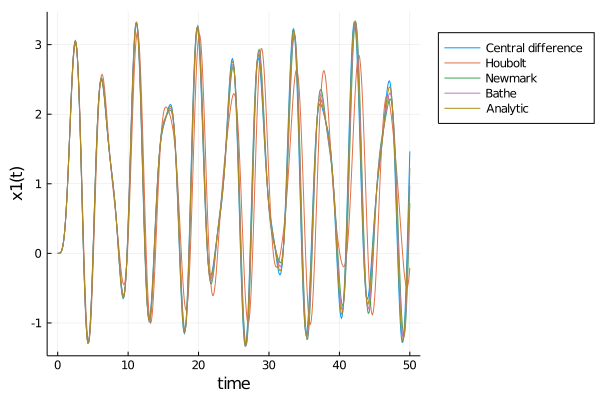

In [14]:
fig

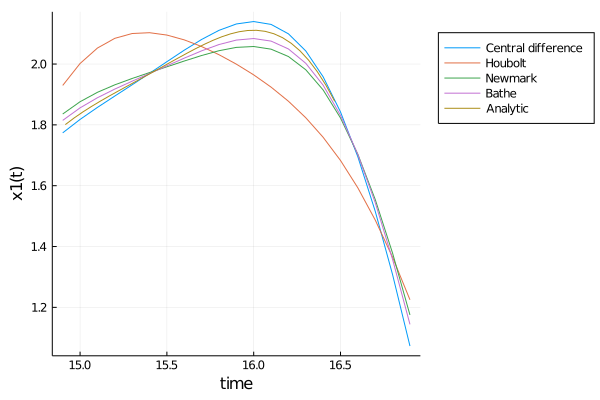

In [4]:
fig2

In [5]:
NSTEPS = 5000
@btime sol = solve($prob, Trapezoidal(Δt=0.05), $NSTEPS)
@btime sol = solve($prob, Bathe(Δt=0.05), $NSTEPS);

  4.169 ms (105019 allocations: 9.73 MiB)
  7.364 ms (180026 allocations: 16.60 MiB)


```
master
  3.945 ms (105021 allocations: 9.77 MiB)
  7.406 ms (180028 allocations: 16.63 MiB)
```

In [7]:
using StaticArrays

In [20]:
M = SA[2 0; 0 1.]
K = SA[6 -2; -2 4.]
C = @SMatrix zeros(2, 2)
f = SA[0.0, 10.0]
example_9_1_Bathe_st = SecondOrderAffineContinuousSystem(M, C, K, f)
U₀ = @SVector zeros(2)
U₀′ = @SVector zeros(2)
prob_st = InitialValueProblem(example_9_1_Bathe_st, (U₀, U₀′))

InitialValueProblem{SecondOrderAffineContinuousSystem{Float64,SArray{Tuple{2,2},Float64,2,4},SArray{Tuple{2,2},Float64,2,4},SArray{Tuple{2,2},Float64,2,4},SArray{Tuple{2},Float64,1,2}},Tuple{SArray{Tuple{2},Float64,1,2},SArray{Tuple{2},Float64,1,2}}}(SecondOrderAffineContinuousSystem{Float64,SArray{Tuple{2,2},Float64,2,4},SArray{Tuple{2,2},Float64,2,4},SArray{Tuple{2,2},Float64,2,4},SArray{Tuple{2},Float64,1,2}}([2.0 0.0; 0.0 1.0], [0.0 0.0; 0.0 0.0], [6.0 -2.0; -2.0 4.0], [0.0, 10.0]), ([0.0, 0.0], [0.0, 0.0]))

In [25]:
# using regular arrays
@btime solve($prob, CentralDifference(Δt=0.05), 5000);
@btime solve($prob, Trapezoidal(Δt=0.05), 5000);
@btime solve($prob, Bathe(Δt=0.05), 5000);

  2.509 ms (50016 allocations: 5.00 MiB)
  3.803 ms (105019 allocations: 9.73 MiB)
  7.287 ms (180026 allocations: 16.60 MiB)


In [29]:
typeof(prob)

InitialValueProblem{SecondOrderAffineContinuousSystem{Float64,Array{Float64,2},Array{Float64,2},Array{Float64,2},Array{Float64,1}},Tuple{Array{Float64,1},Array{Float64,1}}}

In [35]:
typeof(prob.s)

SecondOrderAffineContinuousSystem{Float64,Array{Float64,2},Array{Float64,2},Array{Float64,2},Array{Float64,1}}

In [40]:
@inferred solve(prob, CentralDifference(Δt=0.05), 5000);
@inferred solve(prob, Houbolt(Δt=0.05), 5000);
@inferred solve(prob, Trapezoidal(Δt=0.05), 5000);
@inferred solve(prob, Bathe(Δt=0.05), 5000);

In [41]:
# using static arrays
@btime solve($prob_st, CentralDifference(Δt=0.05), 5000);
@btime solve($prob_st, Houbolt(Δt=0.05), 5000);
@btime solve($prob_st, Trapezoidal(Δt=0.05), 5000);
@btime solve($prob_st, Bathe(Δt=0.05), 5000);

  34.482 μs (2 allocations: 78.27 KiB)
  47.966 μs (3 allocations: 78.41 KiB)
  77.944 μs (6 allocations: 234.80 KiB)
  126.867 μs (6 allocations: 234.80 KiB)


In [42]:
# using regular arrays
@btime solve($prob, CentralDifference(Δt=0.05), 5000);
@btime solve($prob, Houbolt(Δt=0.05), 5000);
@btime solve($prob, Trapezoidal(Δt=0.05), 5000);
@btime solve($prob, Bathe(Δt=0.05), 5000);

  2.638 ms (50016 allocations: 5.00 MiB)
  2.671 ms (60026 allocations: 5.53 MiB)
  4.048 ms (105019 allocations: 9.73 MiB)
  7.240 ms (180026 allocations: 16.60 MiB)
